In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [9]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2022, 10, 16)
google = web.DataReader("GOOG", 'yahoo', start, end)
apple = web.DataReader("AAPL", 'yahoo', start, end)
meta = web.DataReader("META",'yahoo',start,end)
netflix = web.DataReader("NFLX",'yahoo',start,end)
amazon = web.DataReader("AMZN",'yahoo',start,end)

In [10]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,52.616001,50.785500,50.828499,52.292500,30652000.0,52.292500
2019-01-03,52.848999,50.703499,52.049999,50.803001,36822000.0,50.803001
2019-01-04,53.542000,51.370899,51.629501,53.535500,41878000.0,53.535500
2019-01-07,53.700001,52.737999,53.575001,53.419498,39638000.0,53.419498
2019-01-08,54.228001,53.026501,53.805500,53.813999,35298000.0,53.813999


In [12]:
#DATA VISUALIZATION

#-PRICE
#-VOLUME
#-VALUE

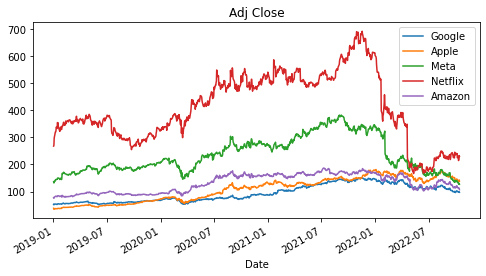

In [13]:
google['Adj Close'].plot(label='Google',figsize=(8,4),title='Adj Close');
apple['Adj Close'].plot(label='Apple');
meta['Adj Close'].plot(label='Meta');
netflix['Adj Close'].plot(label='Netflix');
amazon['Adj Close'].plot(label='Amazon');
plt.legend();
plt.show()

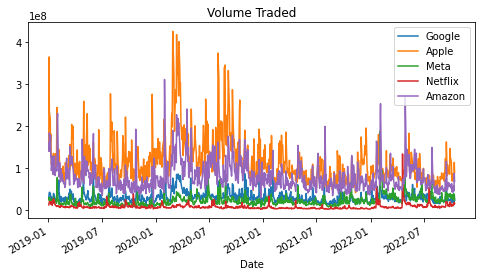

In [14]:
google['Volume'].plot(label='Google',figsize=(8,4),title='Volume Traded');
apple['Volume'].plot(label='Apple');
meta['Volume'].plot(label='Meta');
netflix['Volume'].plot(label='Netflix');
amazon['Volume'].plot(label='Amazon');
plt.legend();
plt.show()

In [15]:
google['Total Traded'] = google['Adj Close']*google['Volume']
apple['Total Traded'] = apple['Adj Close']*apple['Volume']
meta['Total Traded'] = meta['Adj Close']*meta['Volume']
netflix['Total Traded'] = netflix['Adj Close']*netflix['Volume']
amazon['Total Traded'] = amazon['Adj Close']*amazon['Volume']

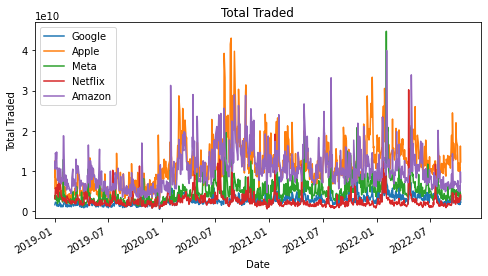

In [16]:
google['Total Traded'].plot(label='Google',figsize=(8,4), title ='Total Traded');
apple['Total Traded'].plot(label='Apple');
meta['Total Traded'].plot(label='Meta');
netflix['Total Traded'].plot(label='Netflix');
amazon['Total Traded'].plot(label='Amazon')
plt.legend();
plt.ylabel('Total Traded');
plt.show()

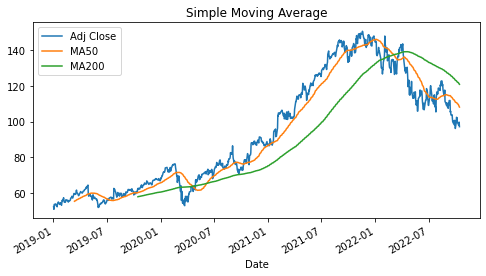

In [18]:
google['MA50'] = google['Adj Close'].rolling(50).mean()
google['MA200'] = google['Adj Close'].rolling(200).mean()
google[['Adj Close','MA50','MA200']].plot(title='Simple Moving Average', label='gm',figsize=(8,4));
plt.show()


In [20]:
from pandas.plotting import scatter_matrix

In [21]:
stock_comp = pd.concat([google['Adj Close'],
apple['Adj Close'],
meta['Adj Close'],
netflix['Adj Close'],
amazon['Adj Close']],axis=1)
stock_comp.columns = ['Google Adj Close','Apple Adj Close','Meta Adj Close', 'Netflix Adj Close', 'Amazon Adj Close']
stock_comp

,Google Adj Close,Apple Adj Close,Meta Adj Close,Netflix Adj Close,Amazon Adj Close
Date,,,,,
2019-01-02,52.292500,38.168346,135.679993,267.660004,76.956497
2019-01-03,50.803001,34.366505,131.740005,271.200012,75.014000
2019-01-04,53.535500,35.833588,137.949997,297.570007,78.769501
2019-01-07,53.419498,35.753830,138.050003,315.339996,81.475502
2019-01-08,53.813999,36.435402,142.529999,320.269989,82.829002
...,...,...,...,...,...
2022-10-10,98.709999,140.419998,133.789993,229.979996,113.669998
2022-10-11,98.050003,138.979996,128.539993,214.289993,112.209999
2022-10-12,98.300003,138.339996,127.500000,220.869995,112.900002


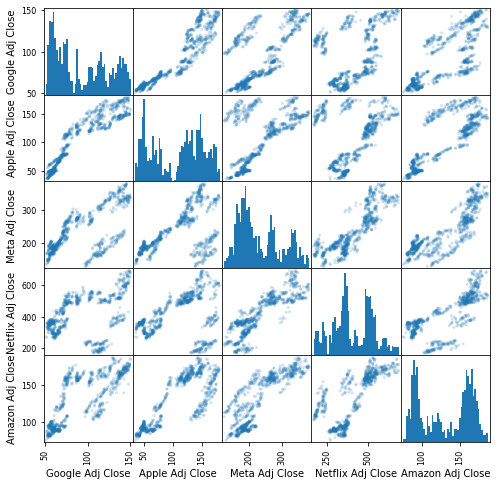

In [22]:
scatter_matrix(stock_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});
plt.show()

In [39]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [50]:
google_reset = google.loc['2022-10': '2022-10'].reset_index()

google_reset['date_ax'] = google_reset['Date']
apply(lambda date: date2num(date))
google_values = tuple(vals) for vals in google_reset \ [['date_ax', 'Open', 'High', 'Low', 'Close']].values]
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b, %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, google_values, width=0.6,
colorup='g',colordown='r');
plt.show()

SyntaxError: invalid syntax (3753265244.py, line 5)

In [52]:
google['returns'] = (google['Adj Close'] / google['Adj Close'].shift(1) ) - 1
google.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2019-01-02,52.616001,50.785500,50.828499,52.292500,30652000.0,52.292500,1.602870e+09,NaN,NaN,NaN
2019-01-03,52.848999,50.703499,52.049999,50.803001,36822000.0,50.803001,1.870668e+09,NaN,NaN,-0.028484
2019-01-04,53.542000,51.370899,51.629501,53.535500,41878000.0,53.535500,2.241960e+09,NaN,NaN,0.053786
2019-01-07,53.700001,52.737999,53.575001,53.419498,39638000.0,53.419498,2.117442e+09,NaN,NaN,-0.002167
2019-01-08,54.228001,53.026501,53.805500,53.813999,35298000.0,53.813999,1.899527e+09,NaN,NaN,0.007385


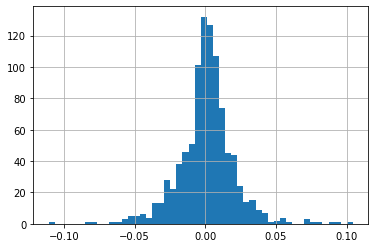

In [53]:
google['returns'].hist(bins=50);
plt.show()


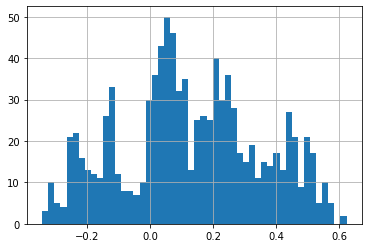

In [55]:
apple['returns'] = (apple['Adj Close'] / google['Adj Close'].shift(1) ) - 1
apple['returns'].hist(bins=50);
plt.show()

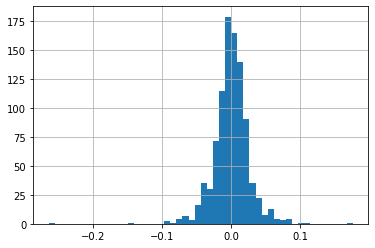

In [56]:
meta['returns'] = (meta['Adj Close'] / meta['Adj Close'].shift(1) ) - 1
meta['returns'].hist(bins=50);
plt.show()

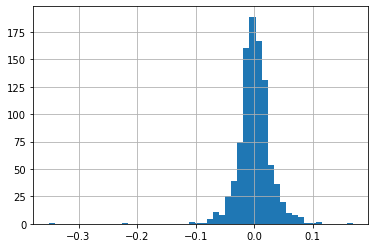

In [57]:
netflix['returns'] = (netflix['Adj Close'] / netflix['Adj Close'].shift(1) ) - 1
netflix['returns'].hist(bins=50);
plt.show()

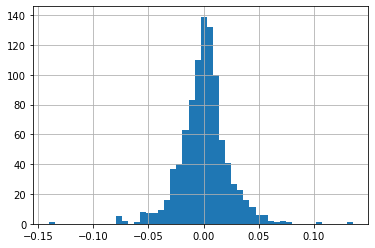

In [58]:
amazon['returns'] = (amazon['Adj Close'] / amazon['Adj Close'].shift(1) ) - 1
amazon['returns'].hist(bins=50);
plt.show()

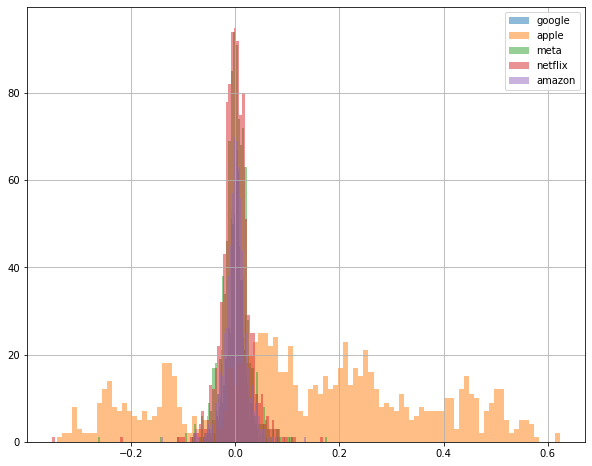

In [59]:
google['returns'].hist(bins=100,label='google', figsize=(10,8),alpha=0.5);
apple['returns'].hist(bins=100,label='apple',alpha=0.5);
meta['returns'].hist(bins=100,label='meta',alpha=0.5);
netflix['returns'].hist(bins=100,label='netflix',alpha=0.5);
amazon['returns'].hist(bins=100,label='amazon',alpha=0.5);
plt.legend();
plt.show()

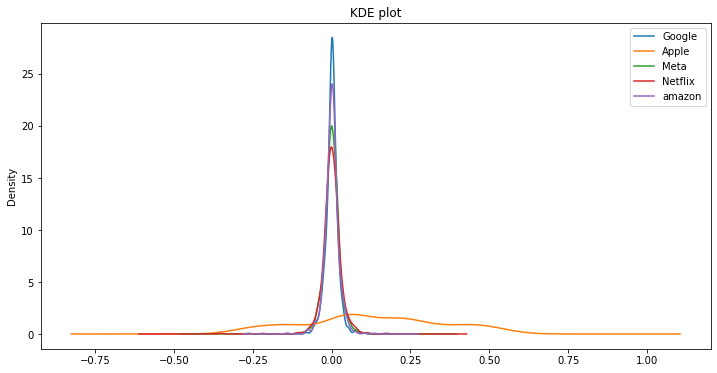

In [76]:
google['returns'].plot(title='KDE plot', kind='kde',label='Google',figsize=(12,6));
apple['returns'].plot(kind='kde',label='Apple');
meta['returns'].plot(kind='kde',label='Meta');
netflix['returns'].plot(kind='kde',label='Netflix');
amazon['returns'].plot(kind='kde',label='amazon');
plt.legend();
plt.show()

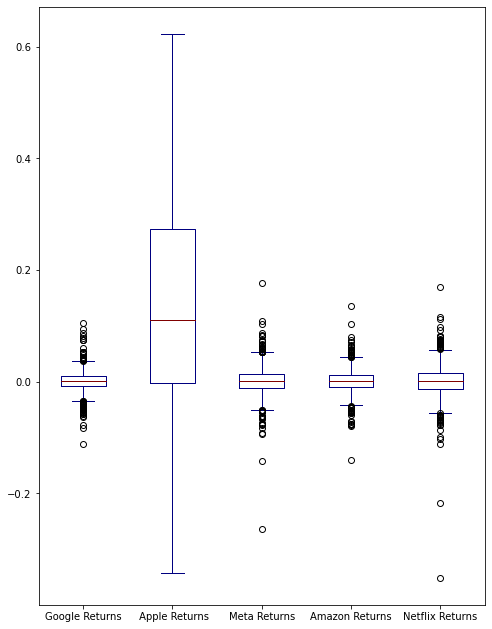

In [62]:
box_df = pd.concat([google['returns'],apple['returns'],meta['returns'],amazon['returns'],netflix['returns']], axis=1)
box_df.columns = ['Google Returns',' Apple Returns','Meta Returns', 'Amazon Returns', 'Netflix Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet');
plt.show()

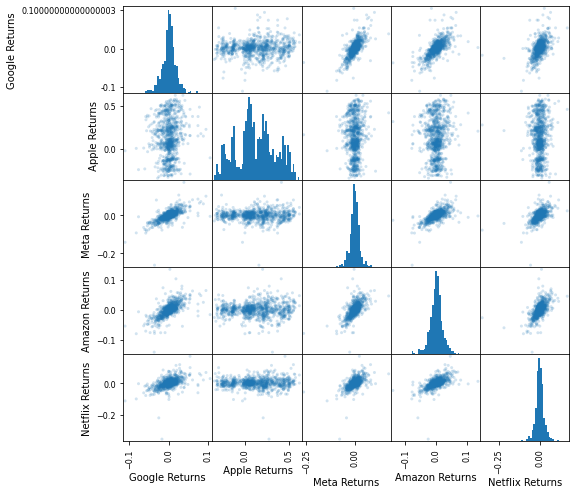

In [63]:
scatter_matrix(box_df,figsize=(8,8),
alpha=0.2,hist_kwds={'bins':50});
plt.show()

In [65]:
google['Cumulative Return'] = (1 + google['returns']).cumprod()
google.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2022-10-10,99.989998,97.870003,99.849998,98.709999,16529900.0,98.709999,1.631666e+09,109.6874,121.922022,-0.008637,1.887651
2022-10-11,100.120003,97.250000,98.250000,98.050003,21617700.0,98.050003,2.119616e+09,109.3388,121.676560,-0.006686,1.875030
2022-10-12,99.648003,97.669998,98.269997,98.300003,17343400.0,98.300003,1.704856e+09,108.9868,121.427740,0.002550,1.879811
2022-10-13,100.529999,95.269997,95.930000,99.709999,32812200.0,99.709999,3.271704e+09,108.6054,121.194050,0.014344,1.906774
2022-10-14,101.290001,97.029999,100.625000,97.180000,22612900.0,97.180000,2.197522e+09,108.1716,120.947427,-0.025374,1.858393


In [70]:
meta['Cumulative Return'] = (1 + meta['returns']).cumprod()
apple['Cumulative Return'] = (1 + apple['returns']).cumprod()
netflix['Cumulative Return'] = (1 + netflix['returns']).cumprod()
amazon['Cumulative Return'] = (1 + amazon['returns']).cumprod()

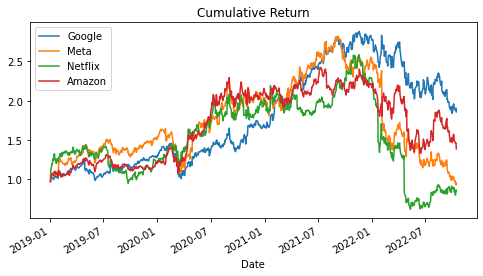

In [72]:
google['Cumulative Return'].plot(label='Google',figsize=(8,4),title='Cumulative Return');

meta['Cumulative Return'].plot(label='Meta');
netflix['Cumulative Return'].plot(label='Netflix');
amazon['Cumulative Return'].plot(label='Amazon');
plt.legend();
plt.show()

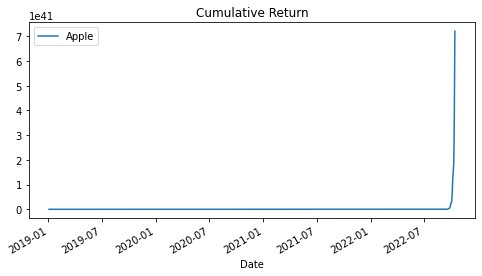

In [74]:
apple['Cumulative Return'].plot(label='Apple',figsize=(8,4),title='Cumulative Return')
plt.legend()
plt.show()